# Importando dados (aula 2)


---

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('aluguel.csv', sep = ';')

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
dados.dtypes

In [ ]:
dados.info()#a diferença é que com o .info() você tem ideia dos nulls

In [ ]:
dados.shape#[0][1]

In [ ]:
print('A base de dados apresenta {} registros(imoveis) e {} variáveis'.format(dados.shape[0],dados.shape[1]))

importando outros dados

dados_json=open('dados.json')

print(dados_jason)# você só registra, mas não é um data frame

dados_json=pd.read_json('dados.json')#já pela como data frame


---


dados_txt=open('dados.txt')

print(dados_txt)# você só registra, mas não é um data frame

dados_txt=pd.read_table('dados.txt')#já pela como data frame


---



---


dados_xlsx=open('dados.xlsx')

print(dados_xlsx)# você só registra, mas não é um data frame

dados_xlsx=pd.read_excel('dados.xlsx')#já pela como data frame

# Removendo valores repetidos (aula 03)

Removendo valores repetidos

In [ ]:
dados['Bairro']#object
dados[['Bairro']]#dataframe

In [ ]:
dados_bairro=dados[['Bairro']]
dados_bairro.head()

In [ ]:
#dados_bairro.drop_duplicates() #apaga valores repetidos
dados_bairro.drop_duplicates(inplace=True)

Redefinindo o index

In [ ]:
dados_bairro.index

In [ ]:
dados_bairro.shape[0]

162

In [ ]:
range(dados_bairro.shape[0])

range(0, 162)

In [ ]:
dados_bairro.index = range(dados_bairro.shape[0]) # recria os indices que estavam com buracos
dados_bairro

# Filtrando de dados (aula 04)

Filtrando dados

In [ ]:
list(dados['Tipo'].drop_duplicates())

In [ ]:
casas = ['Casa','Casa de Condomínio', 'Casa Comercial','Casa de Vila']

In [ ]:
selecao = dados['Tipo'].isin(casas)#volta todos os itens com false/true

In [ ]:
dados_casas = dados[selecao]
dados_casas

Exportando base de dados

In [ ]:
dados_casas.to_csv('...diretório\nomedados.csv', index = False, sep = ';')#o index tira o indice que já está incuido ocultamente no dataframe

# Frequência de imóveis (aula 05)

In [ ]:
selecao2=((dados['Tipo']=='Casa')|(dados['Tipo']=='Quitinete'))&(dados['Valor']<=1500) #|(ou)   &(e)

In [ ]:
d_selecao2 = dados[selecao2]
d_selecao2#.shape[0]

# Tratamento de dados (aula 06)

Tirando os valores nulos

In [ ]:
dados.isnull().head()#devolve o dataset com valores booleanos
#dados.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True


In [ ]:
dados.info()# nos da ideia das variaveis que estão nulas
#no caso, vemos que Valor, Condominio e IPTU

In [ ]:
dados[dados['IPTU'].isnull()].head()#mostra só os os itens que tem null no IPTU

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN


In [ ]:
dados.dropna(subset=['Valor'],inplace = True)# apaga os valores nulos em VALOR

Tratamento condicional

In [ ]:
dados[dados['Condominio'].isnull()].shape[0]

In [ ]:
selecao3 = (dados['Tipo']=='Apartamento') & (dados['Condominio'].isnull())

In [ ]:
dados = dados[~selecao3] # vai remover todos os itens de apartamento que tem condomimio nulo
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
dados[dados['Condominio'].isnull()].shape[0]#

3344

In [ ]:
dados = dados.fillna({'Condominio':0,'IPTU':0})# substitui o NaN por 0

In [ ]:
dados[dados['Condominio'].isnull()].shape[0]# vê o quanto que sobrou ( '0' )

0

In [ ]:
dados.info()#todos não nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  32198 non-null  float64
 8   IPTU        32198 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [ ]:
dados.to_csv('.....dados.csv', sep = ':', index = False)#converte pra um arquivo csv

Outras formas de tratar

In [ ]:
#dados.fillna(0) substitui por 0
#dados.fillna(method = 'ffill') anterior
#dados.fillna(method = 'bfill') depois
#dados.fillna(method = 's.mean') pela media

#Novas variáveis(aula 07)

Criando novas variaveis

In [ ]:
dados['V_total']=(dados['Valor'] + dados['IPTU'])#Criando nova coluna
dados.head()

In [ ]:
#Criando uma coluna dependendo de categorias de outra
dados['Tipo_Agregado']=dados['Tipo'].apply(lambda x: 'Casas' if x in casas else 'Apartamento')#casas já foi definido
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,V_total,Tipo_Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,1760.0,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,Casas
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,6311.0,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,820.0,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,NaN,Apartamento


Excluir variáveis

In [ ]:
df_aux = pd.DataFrame(dados[['Tipo_Agregado','V_total','Valor']])#criando uma df só pra mostrar
df_aux.head()

,Tipo_Agregado,V_total,Valor
0,Apartamento,1760.0,1700.0
1,Casas,NaN,7000.0
2,Apartamento,6311.0,5200.0
3,Apartamento,820.0,800.0
4,Apartamento,NaN,800.0


In [ ]:
del df_aux['Valor']# apaga coluna
df_aux.pop['V_total']# apaga coluna
dados.drop(['Tipo_Agregado','V_total'],axis = 1, inplace = True)#0-linha   1-coluna  

# Extra (value_counts e unique)

In [ ]:
dados['Tipo'].unique()# muito melhor do que fazer o drop duplicates
#Pode escrever:
#dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
dados['Tipo'].value_counts()#faz uma distribuição de frequencia
#Pode escrever:
#dados.Tipo.value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

# Estatísticas Descritivas (aula 08)

Criando agrupamentos

In [ ]:
dados['Valor'].mean() #median()

12952.659715265761

In [ ]:
bairros = ['Copacabana','Jardim Botânico','Barra da Tijuca','Centro','Higienópolis','Vista Alegre','Tijuca']

In [ ]:
selecao4 = dados['Bairro'].isin(bairros)

In [ ]:
df_aux2 = dados[selecao4]
df_aux2

In [ ]:
grupo_bairro= dados.groupby('Bairro')#agrupa, mas vc não consegue usar pra nada o grupo_bairro
grupo_bairro.groups # separa cada categoria com os indices de seus respectivos itens

{'Abolição': [2333, 4857, 10254, 10684, 11719, 14026, 14971, 15454, 19885, 20022, 21523, 22497, 23804, 24298, 25171, 25952, 28007, 28488, 28499, 30407, 30707, 32328], 'Alto da Boa Vista': [3315, 14190, 18345, 19109, 20137, 20448, 22011], 'Anchieta': [4603, 10494, 12605, 13584, 15384, 16390, 18974, 19211, 23364, 23426, 23699, 26996], 'Andaraí': [446, 577, 672, 768, 920, 1185, 1275, 1285, 1490, 1770, 2043, 2121, 2130, 2537, 2883, 3041, 3227, 4094, 4790, 4906, 5329, 5477, 5734, 5906, 6476, 6598, 6989, 7279, 7450, 7461, 7559, 7578, 8515, 8847, 9221, 9604, 9928, 10060, 10628, 11016, 11387, 11790, 12100, 12102, 12365, 12912, 14021, 14164, 14223, 14303, 14814, 15133, 15405, 15623, 15655, 16034, 16551, 16663, 16671, 16875, 17552, 18016, 18721, 19401, 20143, 20356, 20361, 20921, 21087, 21132, 21143, 21559, 22119, 22126, 22232, 22424, 23286, 24089, 24230, 24322, 24976, 24982, 25113, 25192, 26527, 26916, 26962, 27161, 27489, 27619, 27945, 28424, 28606, 28651, 28829, 29746, 29864, 29888, 30397, 30

In [ ]:
grupo_bairro['Valor'].mean() #calcula a média por categoria

Estatísticas descritivas

In [ ]:
grupo_bairro['Valor'].describe().round(2)

In [ ]:
grupo_bairro['Valor'].aggregate(['min','max','sum']) #pode colocar mais medidas de disperção/tendencia central

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10)) #precisa definir as dimensões da figura

In [ ]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor médio do aluguel')

Criando faixas de valor

In [ ]:
classes = [0,2,4,6,100] # cria as classes
labels = ['1-2','3-4','5-6','7-100'] # cria labels
quartos = pd.cut(dados.Quartos, classes, labels = labels, include_lowest=True) # já classifica os quartos de acordo com as classes(MUITO MAIS FÁCIL QUE O R)
quartos

# Removendo Outlier (aula 9)

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize =(14,6))

In [ ]:
dados.boxplot(['Valor'])

In [9]:
dados[dados['Valor'] >=500000].head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
826,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,NaN,NaN
884,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1163,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2722,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2994,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0


In [10]:
valor = dados['Valor']

In [15]:
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
IIQ = q3 - q1
l_inf=q1 - 1.5*IIQ
l_sup=q3 + 1.5*IIQ

In [16]:
selecao = (valor >= l_inf)&(valor <= l_sup)
dados_new = dados[selecao]

In [ ]:
dados_new.boxplot(['Valor'])

In [ ]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outlier

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


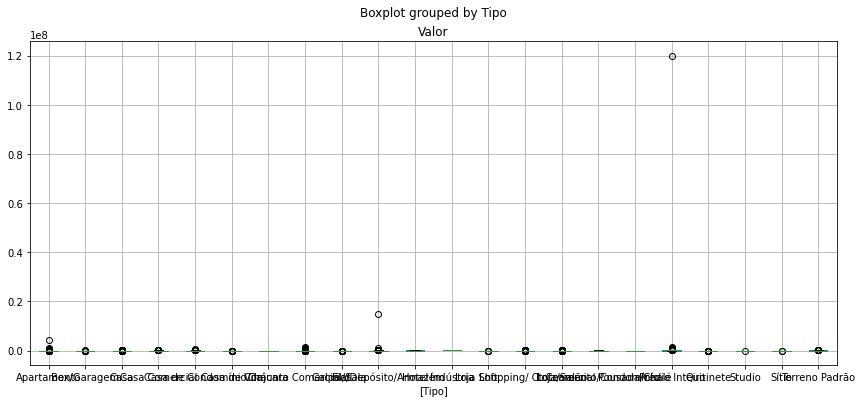

In [20]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [21]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [22]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [23]:
grupo_tipo.groups

{'Apartamento': [3, 4, 5, 6, 10, 11, 12, 13, 15, 19, 20, 21, 23, 24, 27, 28, 30, 32, 33, 34, 36, 37, 40, 41, 43, 44, 47, 48, 49, 50, 51, 54, 55, 56, 57, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 75, 76, 77, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 106, 107, 109, 111, 113, 114, 118, 119, 121, 122, 124, 125, 126, 131, 132, 133, 134, 135, 137, 139, 140, 141, 147, 148, 152, 153, 154, 158, 160, 162, 163, 164, 165, 166, 167, 170, ...], 'Box/Garagem': [207, 373, 579, 885, 1014, 1636, 1664, 1850, 1945, 2502, 3084, 3471, 3587, 3605, 3783, 3860, 3960, 4000, 4273, 5885, 6123, 6775, 7169, 7446, 7932, 9239, 9309, 9327, 9726, 10304, 10467, 11488, 12056, 12118, 12229, 12763, 12783, 13251, 13887, 13970, 15116, 15635, 16270, 16518, 17413, 17631, 18089, 18777, 19106, 19585, 20039, 20296, 20805, 21262, 21346, 21689, 22339, 22351, 22559, 23957, 24470, 24801, 25072, 25206, 25385, 25636, 26346, 26758, 26831, 27673, 28675, 28691, 28692, 28931, 29441, 30071, 30261, 30863, 31175, 31646,

In [24]:
q1 = grupo_tipo.quantile(.25)
q3 = grupo_tipo.quantile(.75)
IIQ = q3 - q1
l_inf=q1 - 1.5*IIQ
l_sup=q3 + 1.5*IIQ

In [25]:
q1

Tipo
Apartamento                      1600.0
Box/Garagem                       250.0
Casa                             1100.0
Casa Comercial                   6000.0
Casa de Condomínio               4000.0
Casa de Vila                      750.0
Chácara                          4900.0
Conjunto Comercial/Sala          1000.0
Flat                             2500.0
Galpão/Depósito/Armazém          7000.0
Hotel                           18500.0
Indústria                      120000.0
Loft                             1750.0
Loja Shopping/ Ct Comercial      1500.0
Loja/Salão                       2200.0
Loteamento/Condomínio           14000.0
Pousada/Chalé                    1480.0
Prédio Inteiro                  14900.0
Quitinete                         900.0
Studio                           1500.0
Sítio                            9750.0
Terreno Padrão                   8000.0
Name: Valor, dtype: float64

In [26]:
l_sup['Casa']

22850.0

In [28]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados['Valor']>= l_inf[tipo]) & (dados['Valor'] <= l_sup[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new,dados_selecao])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


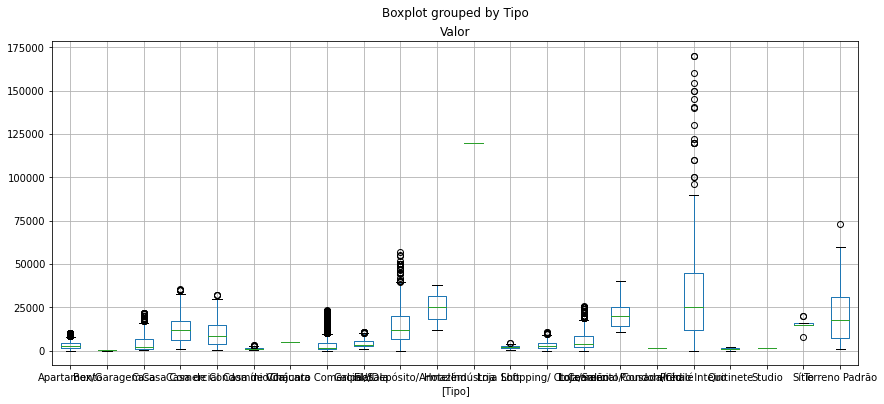

In [30]:
dados_new.boxplot(['Valor'],by = ['Tipo'])

## Extra

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize =(15,8))

In [ ]:
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head()

In [31]:
area = plt.figure()

<Figure size 1008x432 with 0 Axes>

In [32]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

In [40]:
g1.scatter(dados.Valor,dados.Area)
g1.set_title('Valor x Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label,valores)
g4.set_title('Valor Médio')

Text(0.5, 1.0, 'Valor Médio')

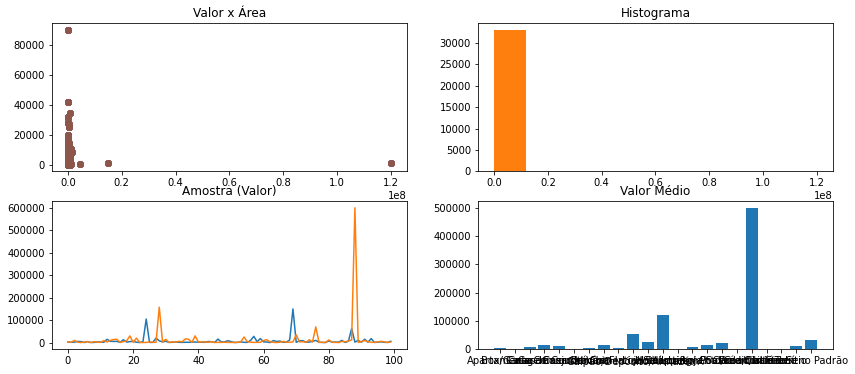

In [41]:
area

In [ ]:
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')